In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python"

name_list = ['T2', 'T5', 'T10', 'T2_cul', 'T5_cul', 'T10_cul', 'T2_CC', 'T5_CC', 'T10_CC']
scale_factors = [0.8, 0.6, 0.4, 0.2, 0.0]

files = [f"{path}/percent_decrease_{name}.csv" for name in name_list]

dataframes = []
dataframes_summed = []

for i, file in enumerate(files):
    df = pd.read_csv(file)
    # Drop the first column if it is unnamed (index from CSV)
    if 'index' in df.columns:
        df = df.drop(columns=['index'])
    # Ensure 'scale factor' column exists and is correct
    df['scale factor'] = scale_factors
    df = df.set_index('scale factor')
    # Sum all gauge columns for each scale factor
    gauge_cols = [col for col in df.columns if col not in ['simulation', 'total %']]
    numeric_cols = df[gauge_cols].select_dtypes(include=[np.number]).columns

    df_summed = df[numeric_cols].groupby('scale factor').sum()
    df_summed['total %'] = df_summed.sum(axis=1)
    df_summed = df_summed['total %'].reset_index()
    df_summed['simulation'] = name_list[i]
    dataframes_summed.append(df_summed)
    dataframes.append(df)

# Combine all summed DataFrames
all_summed = pd.concat(dataframes_summed, ignore_index=True)
print(all_summed)
all_summed.to_csv(f"{path}/percent_decrease_flood_volume_summed.csv", index=False)

    scale factor    total % simulation
0            0.0  65.427122         T2
1            0.2  52.804820         T2
2            0.4  39.884604         T2
3            0.6  26.785827         T2
4            0.8  13.535036         T2
5            0.0  72.830167         T5
6            0.2  58.837467         T5
7            0.4  44.482872         T5
8            0.6  29.797361         T5
9            0.8  14.949223         T5
10           0.0  75.024355        T10
11           0.2  60.462369        T10
12           0.4  45.540813        T10
13           0.6  30.447256        T10
14           0.8  15.266051        T10
15           0.0  61.810152     T2_cul
16           0.2  49.332705     T2_cul
17           0.4  36.989726     T2_cul
18           0.6  24.681216     T2_cul
19           0.8  12.301094     T2_cul
20           0.0  67.617198     T5_cul
21           0.2  53.982727     T5_cul
22           0.4  40.519375     T5_cul
23           0.6  27.021601     T5_cul
24           0.8  13.5063

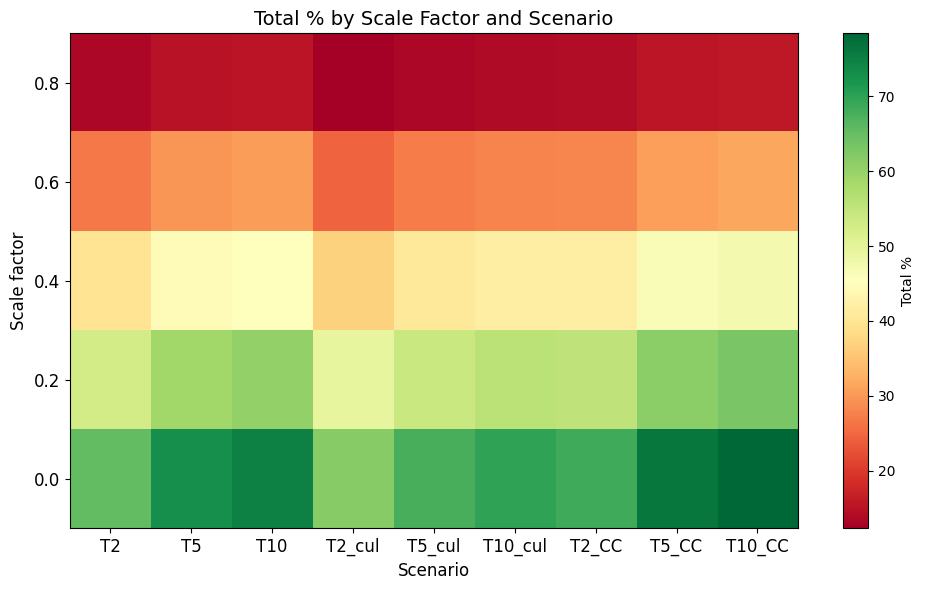

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Use the order of scenarios as they appear in all_summed
scenario_order = all_summed['simulation'].unique()
scale_factor_order = all_summed['scale factor'].unique()

# Pivot with the specified order
pivot = all_summed.pivot(index='scale factor', columns='simulation', values='total %')
pivot = pivot.loc[scale_factor_order, scenario_order]

plt.figure(figsize=(10, 6))
im = plt.imshow(pivot.values, aspect='auto', cmap='RdYlGn', origin='lower')

plt.colorbar(im, label='Total %')
plt.xticks(ticks=np.arange(len(scenario_order)), labels=scenario_order, fontsize=12)
plt.yticks(ticks=np.arange(len(scale_factor_order)), labels=scale_factor_order, fontsize=12)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Scale factor', fontsize=12)
plt.title('Total % by Scale Factor and Scenario', fontsize=14)
plt.tight_layout()
plt.savefig(f"{path}/percent_decrease_flood_volume_heatmap_per_scenario.png", dpi=300)
plt.show()